In [1]:
import numpy as np
import math

In [2]:
L,d_k, d_v = 4,8,8   # L = length of input sequence (my name is ajay) , d_k = dimension of key, d_v = dimension of value
q = np.random.rand(L,d_k)  # query
k = np.random.rand(L,d_k)  # key
v = np.random.rand(L,d_v)  # value

In [3]:
print("Query : ",q)
print("Key : ",k)
print("Value : ",v)


Query :  [[0.59564702 0.76040843 0.86895416 0.8152774  0.27476337 0.16748942
  0.31317867 0.75824113]
 [0.1870248  0.71975155 0.38212363 0.57332365 0.3385321  0.49977664
  0.09704412 0.24806598]
 [0.56593594 0.99262282 0.08218359 0.19185004 0.825709   0.06838718
  0.1052454  0.59660279]
 [0.54241316 0.80939352 0.64068365 0.8313057  0.51193425 0.19921345
  0.3400253  0.69363007]]
Key :  [[0.28167694 0.99622185 0.24271498 0.69536093 0.44553619 0.9850844
  0.87229937 0.85433312]
 [0.93590693 0.0583852  0.81818061 0.83156203 0.55888654 0.81538816
  0.81187309 0.30143125]
 [0.95245338 0.45497257 0.37716009 0.52896819 0.61088784 0.6159607
  0.68045322 0.50391241]
 [0.94263653 0.55137519 0.00809731 0.79869416 0.64938682 0.29627511
  0.50163011 0.71053646]]
Value :  [[0.49447657 0.37126254 0.3209625  0.42510886 0.78831076 0.10772784
  0.50786591 0.20747242]
 [0.51145057 0.32050146 0.99230245 0.54370006 0.24870138 0.36195801
  0.19443501 0.23561574]
 [0.19540777 0.83928116 0.12148805 0.42441249

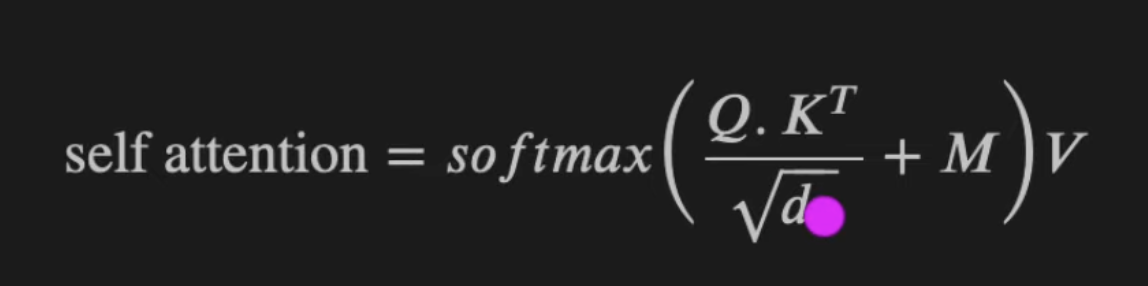

In [4]:
np.matmul(q,k.T)

array([[2.91152008, 2.76373129, 2.5384887 , 2.56285096],
       [2.20085977, 1.75673629, 1.65867679, 1.62700382],
       [2.33838927, 1.59691445, 2.04191222, 2.26784272],
       [3.00620411, 2.70407065, 2.58259185, 2.68160653]])

In [5]:
scaled = np.matmul(q,k.T)/math.sqrt(d_k)
scaled

array([[1.02937779, 0.97712657, 0.89749129, 0.90610465],
       [0.77812143, 0.62110007, 0.5864308 , 0.57523272],
       [0.82674545, 0.56459452, 0.72192499, 0.80180348],
       [1.06285366, 0.95603335, 0.91308411, 0.94809108]])

# masking

In [6]:
mask = np.tril(np.ones((L,L)))
mask

array([[1., 0., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 1., 0.],
       [1., 1., 1., 1.]])

In [8]:
mask[mask == 0] = -np.infty
mask[mask == 1] = 0
mask

array([[  0., -inf, -inf, -inf],
       [  0.,   0., -inf, -inf],
       [  0.,   0.,   0., -inf],
       [  0.,   0.,   0.,   0.]])

In [9]:
scaled + mask

array([[1.02937779,       -inf,       -inf,       -inf],
       [0.77812143, 0.62110007,       -inf,       -inf],
       [0.82674545, 0.56459452, 0.72192499,       -inf],
       [1.06285366, 0.95603335, 0.91308411, 0.94809108]])

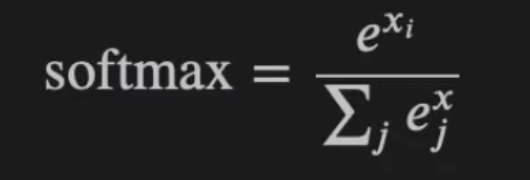

In [10]:
def softmax(x):
    return (np.exp(x) / np.sum(np.exp(x), axis=1))

In [11]:
attention = softmax(scaled+mask)
attention

array([[1.        , 0.        , 0.        , 0.        ],
       [0.77782294, 0.46082512, 0.        , 0.        ],
       [0.81657841, 0.43550795, 0.33727576, 0.        ],
       [1.03404248, 0.64416306, 0.4083236 , 0.24418953]])

In [ ]:
new_v = np.matmul(attention,v)
new_v